## Simple linear regression :
In this regression task ,i need to predict the percentage of marks that student is expected to score if a student studies for 9.25 hrs a day.It's a simple regression task as it involves just two variables ie. no. of hrs and corresponding score.

INDEX
1. Import libraries and dataset
2. Exploring the Data
3. Preparing and visualising the dataset
4. Training the Algorithm
5. Visualize comparison of result
6. Predicting the value on Test set
7. Making Predictions For Given Question
8. Evaluating result

In [1]:
#import libraries for data wrangling ,scientinfic computing and plotting
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt
%matplotlib.inline               

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
# import data
url="task2_data.txt"
data = pd.read_csv(url)

In [3]:
# exploring dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
import seaborn as sns
import seaborn as seabornInstance

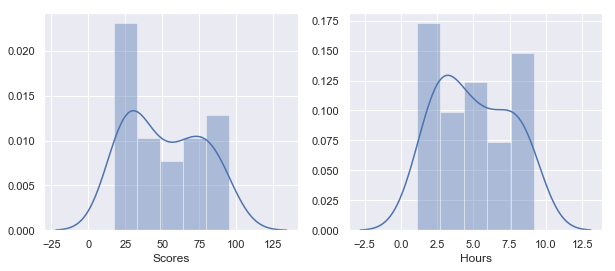

In [7]:

seabornInstance.set(rc={"figure.figsize": (10, 4)})
figure,axes=plt.subplots(1,2)
seabornInstance.distplot(data['Scores'], bins=5,ax=axes[0])

seabornInstance.distplot(data['Hours'], bins=5,ax=axes[1])

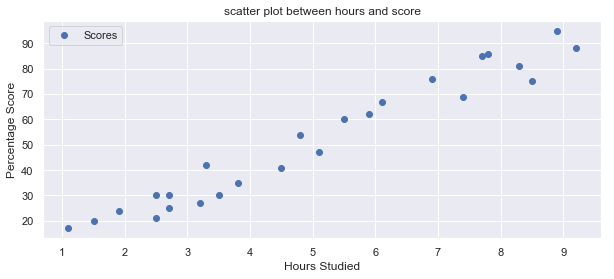

In [8]:
#visualizing data
data.plot(x="Hours",y="Scores",style="o")
plt.title("scatter plot between hours and score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [9]:
#Preparing dataset
x=data.iloc[:,0:1].values
y=data.iloc[:,1].values

In [10]:
# training the algorithm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:

from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)
r_sq=model.score(x,y)
print("coefficient of determination:" ,r_sq)

coefficient of determination: 0.9529481969048356


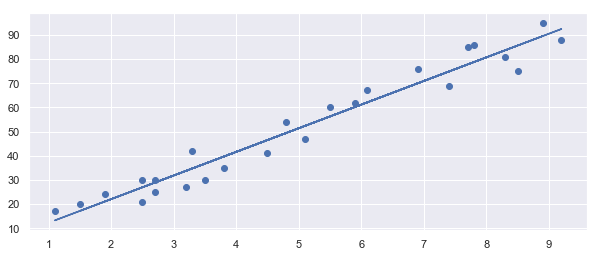

In [12]:
#visualising result
regression=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,regression)
plt.show()

In [13]:
#predicting value of test set
y_pred=model.predict(x_test)
new_data=pd.DataFrame({"Actual": y_test,"predicted": y_pred})
print(new_data)

   Actual  predicted
0      17  13.237057
1      42  34.743825
2      24  21.057700
3      75  85.578002
4      54  49.407530


In [14]:
#making prediction for given question
hr=np.array([9.25])
prediction=model.predict(hr.reshape(-1,1))
print("no. of hours: ",hr[0])
print("percentage score: ",prediction[0])

no. of hours:  9.25
percentage score:  92.9098547701573


In [15]:
#performance evaluation
from sklearn import metrics
#mean absolute error
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
#mean squared error
print("MSE: ",metrics.mean_squared_error(y_test,y_pred) )
#root mean square error
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  5.826378193566591
MSE:  41.69077308850673
RMSE:  6.456839249083621
